<a href="https://colab.research.google.com/github/angelome/python_financial/blob/main/PCA_on_stocks_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Get the data
Start by importing the libraries. 
sklearn is a package used to build statistical models for data analysis.

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

portfolio of stocks I want to analyse

In [4]:
symbols = [ 'IBM', 'MSFT', 'META','INTC', 'NEM','AU','AEM','GFI']


download and clean data

In [5]:
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


In [6]:
#Step 2: Fit a PCA model
#sklearn makes it easy to fit a PCA model and get the components.

pca = PCA(n_components=3)
pca.fit(portfolio_returns)
#The n_components argument tells sklearn how many of the top components to return. 
#Fit the model with the portfolio returns and the algorithm will look for the top three components that explain most of the variance in the returns.


PCA(n_components=3)

In [7]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_
# After you fit the model, grab the explained variance and components 

In [9]:
pct

array([0.54983189, 0.22756866, 0.06990876])

"pct" shows the contribution of the top three components toward the total variance.
These components contribute the most to the information in the data. The first component explains 54.9% of the variation in the portfolio returns.

In [10]:
pca_components

array([[ 0.37594631,  0.54951356,  0.64159951,  0.07896229,  0.09811401,
         0.1225272 ,  0.10081186,  0.32250881],
       [ 0.02793496,  0.12305942,  0.17653234, -0.25222651, -0.53577064,
        -0.63526633, -0.44557604,  0.01194328],
       [ 0.12803223, -0.03725371, -0.16023228,  0.44072974,  0.50608724,
        -0.67700394,  0.04718444,  0.21358328]])

(0.0, 100.0)

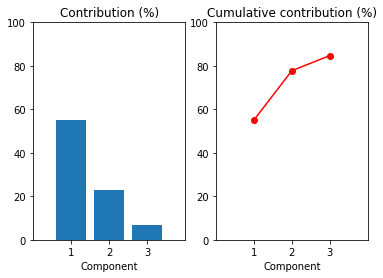

In [11]:
#Step 3: Visualize the components

cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

The chart on the left shows the contribution of the top three components toward the total variance. 
In other words, these components contribute the most to the information in the data. The first component explains 54.9% of the variation in the portfolio returns. In stock portfolios, this is usually driven by the overall market movement.

The chart on the right is the cumulative sum of the contribution of each component. It shows the top three components explain 84.7% of total portfolio returns. Two or three components explaining close to 85% of the contribution is a good result.

Step 4: Isolate the alpha factors
There are drivers that move stock prices that we can’t see. 
These latent factors are picked up through PCA and isolated as the principal components. 
Macroeconomic drivers like interest rates and the pandemic drive returns, too. PCA lets you isolate these statistical factors to get an idea of how much the portfolio’s returns come from these unobserved features.

In [13]:
pca.components_

array([[ 0.37594631,  0.54951356,  0.64159951,  0.07896229,  0.09811401,
         0.1225272 ,  0.10081186,  0.32250881],
       [ 0.02793496,  0.12305942,  0.17653234, -0.25222651, -0.53577064,
        -0.63526633, -0.44557604,  0.01194328],
       [ 0.12803223, -0.03725371, -0.16023228,  0.44072974,  0.50608724,
        -0.67700394,  0.04718444,  0.21358328]])

In [12]:
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["f1", "f2", "f3"], 
                        index=portfolio_returns.index, data=factor_returns)
factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03 00:00:00-05:00,-0.011794,0.015824,-0.007090
2020-01-06 00:00:00-05:00,0.009480,-0.010078,-0.013161
2020-01-07 00:00:00-05:00,-0.006960,0.009891,-0.008298
2020-01-08 00:00:00-05:00,-0.074473,-0.031461,-0.002840
2020-01-09 00:00:00-05:00,-0.012222,-0.023795,-0.001387


First, muliply the portfolio returns by the principle components. 
The resulting DataFrame gives you how much of that day’s portfolio return is a result of each of the three factors.

Similar stocks will be driven by similar factors. PCA makes it easy to visualize this.

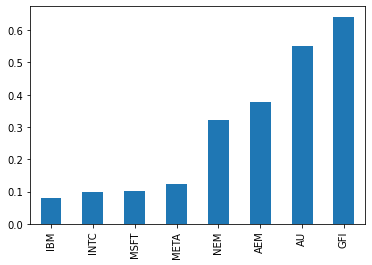

In [14]:
factor_exposures = pd.DataFrame( index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components).T

factor_exposures.f1.sort_values().plot.bar()

In [15]:
factor_exposures 

,f1,f2,f3
AEM,0.375946,0.027935,0.128032
AU,0.549514,0.123059,-0.037254
GFI,0.641600,0.176532,-0.160232
IBM,0.078962,-0.252227,0.440730
INTC,0.098114,-0.535771,0.506087
META,0.122527,-0.635266,-0.677004
MSFT,0.100812,-0.445576,0.047184
NEM,0.322509,0.011943,0.213583


Analyze the first component. Create a DataFrame with the components, grab the first factor, sort stocks by the component, and plot them. 
The tech stocks and the gold stocks clustered together. 
This component is more strongly driving the gold stocks. 
The analysis covers the period between January 2020 and November 2022, during which covid-19 became widespread.

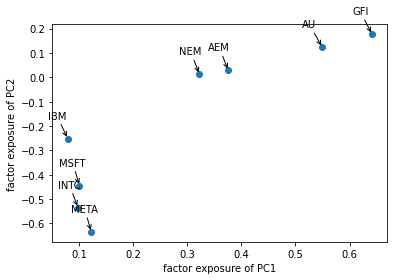

In [17]:
#Another great way to visualize this is with a scatter plot.

labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate( label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

This graph shows how the stocks are driven by the first two principal components. 
Gold stocks were largely driven by factor one. 
Tech stocks were negatively driven by factor two.

This analysis covered the time period during covid. 
Gold stocks were bid up strongly as a hedge against inflation and uncertainty. 
The first factor may be considered as a “covid factor” representing uncertainty across the market. 
Tech stocks crashed as worries of economic health began.